## **Задание 1**
Напишите функцию, которая классифицирует фильмы из материалов занятия по следующим правилам:
  - оценка 2 и меньше - низкий рейтинг
  - оценка 4 и меньше - средний рейтинг
  - оценка 4.5 и 5 - высокий рейтинг  
Результат классификации запишите в столбец class

In [60]:
import pandas as pd
import re

In [2]:
movies = pd.read_csv('ml-latest-small/ratings.csv').merge(pd.read_csv('ml-latest-small/movies.csv'), on='movieId')
movies.head(3)

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama


In [3]:
def movie_class(rating):
    if rating <= 2:
        return 'low'
    elif 2 < rating <= 4.5:
        return 'middle'
    else:
        return 'high'
    
movies['class'] = movies['rating'].apply(movie_class)
movies

,userId,movieId,rating,timestamp,title,genres,class
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama,middle
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama,middle
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama,middle
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama,middle
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama,middle
...,...,...,...,...,...,...,...
99999,664,64997,2.5,1343761859,War of the Worlds (2005),Action|Sci-Fi,middle
100000,664,72380,3.5,1344435977,"Box, The (2009)",Drama|Horror|Mystery|Sci-Fi|Thriller,middle
100001,665,129,3.0,995232528,Pie in the Sky (1996),Comedy|Romance,middle
100002,665,4736,1.0,1010197684,Summer Catch (2001),Comedy|Drama|Romance,low


## **Задание 2**
Используем файл keywords.csv.
​
Необходимо написать гео-классификатор, который каждой строке сможет выставить географическую принадлежность определенному региону. Т. е. если поисковый запрос содержит название города региона, то в столбце 'region' пишется название этого региона. Если поисковый запрос не содержит названия города, то ставим 'undefined'.
​
Правила распределения по регионам Центр, Северо-Запад и Дальний Восток:
​
geo_data = {
 
    'Центр': ['москва', 'тула', 'ярославль'],
    'Северо-Запад': ['петербург', 'псков', 'мурманск'],
    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']

}
​
Результат классификации запишите в отдельный столбец region.

In [52]:
geo_data = {
    'Центр': ['москва', 'тула', 'ярославль'],
    'Северо-Запад': ['петербург', 'псков', 'мурманск'],
    'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']
}

keywords = pd.read_csv('keywords.csv')
keywords.tail(3)

,keyword,shows
99997,укрсиб,3630
99998,погода в ялте на неделю,3688
99999,ггму,3630


In [53]:
geo_data = {j: i[0] for i in geo_data.items() for j in i[1]}
def region(keywords):
    out = []
    for key in keywords.split():
        if key in geo_data:
            return geo_data[key]
        else:
            return 'undefined'

In [54]:
keywords['region'] = keywords.keyword.apply(region)
keywords[(keywords['region'] == 'Дальний Восток') | (keywords['region'] == 'Северо-Запад') |(keywords['region'] == 'Центр')]

,keyword,shows,region
1259,москва,153050,Центр
5858,владивосток,43038,Дальний Восток
5983,москва третий рим,43182,Центр
6075,ярославль,41720,Центр
6999,москва 24,37459,Центр
7103,москва сити,37022,Центр
7339,москва слезам не верит,35857,Центр
8132,москва погода,151701,Центр
8977,мурманск,29984,Северо-Запад
9084,хабаровск,29655,Дальний Восток


##  **Задание 3 (бонусное)**
Есть мнение, что "раньше снимали настоящее кино, не то что сейчас". Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл ratings.csv из базы https://grouplens.org/datasets/movielens). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

1. В переменную years запишите список из всех годов с 1950 по 2010.

2. Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:
  - для каждой строки пройдите по всем годам списка years
  - если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
  - если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год

3. Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец 'year'

4. Посчитайте средний рейтинг всех фильмов для каждого значения столбца 'year' и отсортируйте результат по убыванию рейтинга


In [55]:
movies.head(3)

,userId,movieId,rating,timestamp,title,genres,class
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama,middle
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama,middle
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama,middle


In [56]:
years = [i for i in range(1950, 2011)]
years[0], years[-1]

(1950, 2010)

In [86]:
def production_year(title):
    try:
        year = int(re.findall(r'\d{4}', title)[0])
    except:
        year = 1900
    if year in years:
        return year
    else:
        return 1900

In [87]:
movies['year'] = movies.title.apply(production_year)
movies

,userId,movieId,rating,timestamp,title,genres,class,year
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama,middle,1995
1,7,31,3.0,851868750,Dangerous Minds (1995),Drama,middle,1995
2,31,31,4.0,1273541953,Dangerous Minds (1995),Drama,middle,1995
3,32,31,4.0,834828440,Dangerous Minds (1995),Drama,middle,1995
4,36,31,3.0,847057202,Dangerous Minds (1995),Drama,middle,1995
...,...,...,...,...,...,...,...,...
99999,664,64997,2.5,1343761859,War of the Worlds (2005),Action|Sci-Fi,middle,2005
100000,664,72380,3.5,1344435977,"Box, The (2009)",Drama|Horror|Mystery|Sci-Fi|Thriller,middle,2009
100001,665,129,3.0,995232528,Pie in the Sky (1996),Comedy|Romance,middle,1996
100002,665,4736,1.0,1010197684,Summer Catch (2001),Comedy|Drama|Romance,low,2001


In [88]:
movies[movies.title == 'Stranger Things']

,userId,movieId,rating,timestamp,title,genres,class,year
87487,73,162376,4.5,1474255532,Stranger Things,Drama,middle,1900


In [102]:
year_movies = movies.groupby('year', as_index=False).mean().sort_values('rating', ascending=False)
year_movies

,year,userId,movieId,rating,timestamp
8,1957,360.933544,2750.965190,4.014241,1.083707e+09
23,1972,359.694878,3983.538976,4.011136,1.122759e+09
3,1952,346.394737,4107.796053,4.000000,1.090512e+09
25,1974,356.815443,3981.137476,3.999058,1.114139e+09
5,1954,358.228324,2867.661850,3.994220,1.070591e+09
...,...,...,...,...,...
56,2005,348.509719,37156.244600,3.448434,1.273459e+09
54,2003,340.367306,8141.655875,3.445843,1.237843e+09
47,1996,347.825453,911.292947,3.422675,1.020371e+09
48,1997,357.865513,1972.290482,3.416934,1.085912e+09


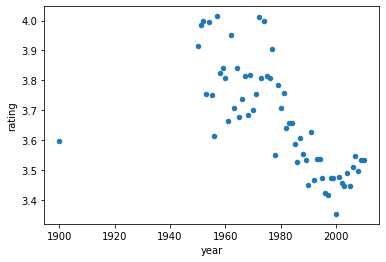

In [110]:
year_movies.plot(x='year', y='rating', kind='scatter');

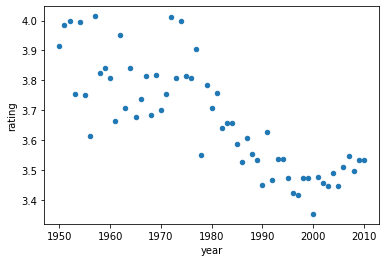

In [111]:
year_movies[year_movies.year != 1900].plot(x='year', y='rating', kind='scatter');